<a href="https://colab.research.google.com/github/akshay-bankar/AI-Architect/blob/main/customer_transaction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Transaction Analysis using NumPy, Pandas, and Matplotlib**

Analyze a dataset of customer transactions to identify trends, patterns, and valuable insights.

**Imports libs**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.preprocessing import LabelEncoder

**Mount drive to read dataset**

In [3]:
drive_path = r'/content/drive'
drive.mount(drive_path)
folder_path = f'{drive_path}/My Drive/Colab Notebooks/dataset'

Mounted at /content/drive


**Read Customer Transaction Dataset from drive** (Refer - customer_transaction_analysis-create_dataset.ipynb)

In [35]:
df = pd.read_csv(f'{folder_path}/customer_transactions.csv')

# Get basic information about the dataset
print(df.info())

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   transaction_date  10000 non-null  object 
 2   product_category  10000 non-null  object 
 3   amount            10000 non-null  float64
 4   city              10000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB
None
   customer_id transaction_date product_category  amount       city
0       841552       2023-04-18      Electronics  262.36    Kolkata
1       630530       2023-04-29        Groceries  876.68  Bangalore
2       400812       2023-11-26         Clothing  380.38     Mumbai
3       120861       2023-06-26         Clothing   36.32     Mumbai
4       535461       2023-12-19        Furniture  386.52  Bangalore
customer_id         0
transaction_date    0
product_category    0
amount              0

**Data Cleaning and Preparation**

In [36]:
# convert date to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Create new features
df['month'] = df['transaction_date'].dt.month
df['day_of_week'] = df['transaction_date'].dt.dayofweek

**Exploratory Data Analysis (EDA)**


count    10000.000000
mean       505.487728
std        286.074463
min         10.090000
25%        257.967500
50%        499.490000
75%        754.015000
max        999.970000
Name: amount, dtype: float64


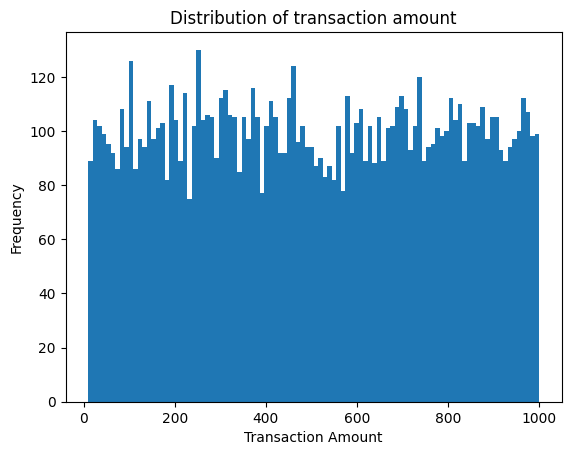

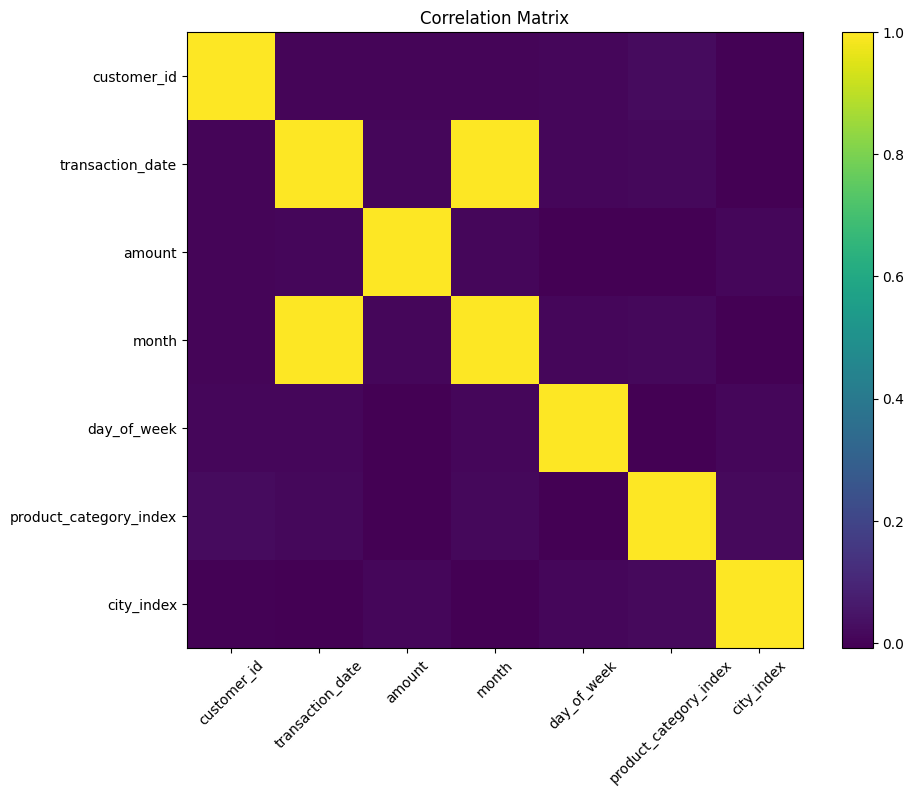

In [37]:
# Calculate summary statistics
print(df['amount'].describe())

# Visualize the distribution of transaction amounts
plt.hist(df['amount'], bins=100)

plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of transaction amount')

plt.show()

# Analyze relationships between variables
le = LabelEncoder()
df['product_category_index'] = le.fit_transform(df['product_category'])
df['city_index'] = le.fit_transform(df['city'])

correlation_matrix = df.drop('product_category', axis=1).drop('city', axis=1).corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

**Data Analysis and Insights**

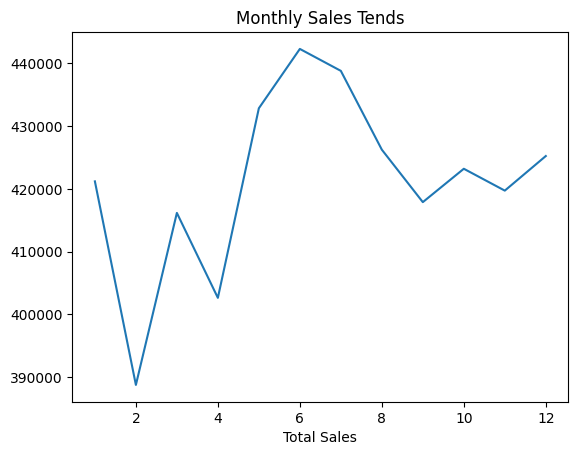

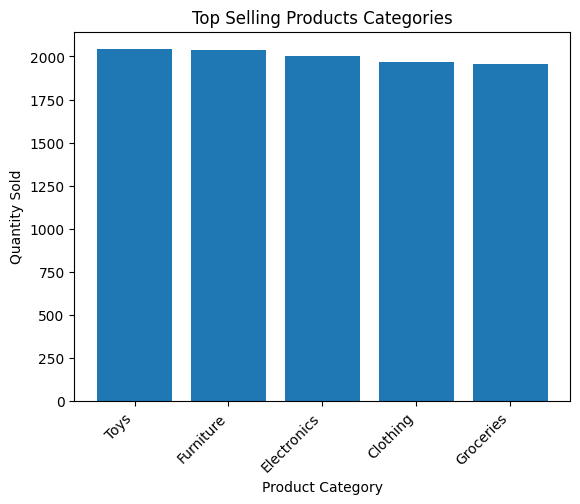

In [39]:
# Group data by month and calculate total sales
monthly_sales = df.groupby('month')['amount'].sum()

# Visualize monthly sales trends
plt.plot(monthly_sales)
plt.xlabel('Month')
plt.xlabel('Total Sales')
plt.title('Monthly Sales Tends')
plt.show()

# Identify top-selling products
top_products = df['product_category'].value_counts().head(10)

# Visualize top-selling products
plt.bar(top_products.index, top_products.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.title('Top Selling Products Categories')
plt.show()